**Clustering Pemain Call of Duty Berdasarkan Performa Permainan**<br>
Apakah Merupakan Pemain **Beginner**, **Intermediate**, **Advance**, atau **Expert**

---
---

# Import Data & Library Package

### Import Library Package

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import warnings

from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, MeanShift, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from kneed import KneeLocator
from skfuzzy import cmeans

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.4f}'.format)

### Import Data

In [75]:
df = pd.read_csv('data/data.csv')
df.head(10)

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.0000,0,1,0,0,0,0,0,0.0000,0,0,0,0,0.0000,0,0
1,JohniceRex#9176033,0,0,0.0000,0,1,0,110,0,7,0,7.0000,0,0,0,700,0.0000,0,16
2,bootybootykill#1892064,0,66,1.0312,0,9,0,110,0,32,16,32.0000,0,1,0,48300,0.0000,0,64
3,JNaCo#5244172,3,2,0.4000,0,1,0,0,0,3,0,3.0000,0,0,0,1150,0.0000,0,5
4,gomezyayo_007#6596687,0,2,0.2000,0,1,0,110,0,5,1,5.0000,0,0,0,1000,0.0000,0,10
5,Brxndoon7-LK#4002715,684,27011,1.0667,18,177,10,110,98332,1366,5113,2.3231,588,6063,305319,3932335,255.6720,403651,25321
6,bdooory_ab#7095171,4,162,0.6328,4,6,2,0,568,8,35,2.0000,4,68,4836,24485,265.5000,5404,256
7,ahevepluto#3505304,186,1898,0.5696,13,37,7,2,5111,550,485,3.6667,150,488,39978,458269,180.3796,45089,3332
8,MilkyLemonz-_-#5981249,741,21803,1.0367,26,185,29,111,81361,2442,3894,2.8264,864,4029,327230,4269370,198.8442,408591,21032
9,RPDUNKduo#8122914,26,349,0.4440,7,12,4,0,996,44,40,2.9333,15,138,4844,72765,253.6773,5840,786


# Exploratory Data Analysis

**Melihat persebaran data**

In [76]:
print("Data mempunyai {} baris dan {} kolom".format(df.shape[0],df.shape[1]))

Data mempunyai 1558 baris dan 19 kolom


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1558 non-null   object 
 1   wins            1558 non-null   int64  
 2   kills           1558 non-null   int64  
 3   kdRatio         1558 non-null   float64
 4   killstreak      1558 non-null   int64  
 5   level           1558 non-null   int64  
 6   losses          1558 non-null   int64  
 7   prestige        1558 non-null   int64  
 8   hits            1558 non-null   int64  
 9   timePlayed      1558 non-null   int64  
 10  headshots       1558 non-null   int64  
 11  averageTime     1558 non-null   float64
 12  gamesPlayed     1558 non-null   int64  
 13  assists         1558 non-null   int64  
 14  misses          1558 non-null   int64  
 15  xp              1558 non-null   int64  
 16  scorePerMinute  1558 non-null   float64
 17  shots           1558 non-null   i

In [78]:
print(f'Melihat Jumlah Data Unik Pada Setiap Kolom\n{df.nunique()}')

Melihat Jumlah Data Unik Pada Setiap Kolom
name              1558
wins               458
kills              885
kdRatio           1149
killstreak          38
level              231
losses              46
prestige            85
hits               865
timePlayed         634
headshots          651
averageTime        859
gamesPlayed        395
assists            662
misses             941
xp                1225
scorePerMinute     959
shots              945
deaths             920
dtype: int64


In [79]:
numerik = df.select_dtypes(include=['int', 'float']).columns
print(f'Kolom Numerik\n{numerik}')

Kolom Numerik
Index(['wins', 'kills', 'kdRatio', 'killstreak', 'level', 'losses', 'prestige',
       'hits', 'timePlayed', 'headshots', 'averageTime', 'gamesPlayed',
       'assists', 'misses', 'xp', 'scorePerMinute', 'shots', 'deaths'],
      dtype='object')


In [80]:
print(f'Total Data pada Kolom yang Memiliki Missing Value\n{df.isnull().sum()}')
print(f"\nTotal Duplikat Data {df.drop(columns=['name']).duplicated().sum()}")

Total Data pada Kolom yang Memiliki Missing Value
name              0
wins              0
kills             0
kdRatio           0
killstreak        0
level             0
losses            0
prestige          0
hits              0
timePlayed        0
headshots         0
averageTime       0
gamesPlayed       0
assists           0
misses            0
xp                0
scorePerMinute    0
shots             0
deaths            0
dtype: int64

Total Duplikat Data 216


### Melihat Data Pemain yang Baru Memulai Permainan Berdasarkan Kolom:
- timePlayed
- shots
- xp
- level

In [81]:
kolom = ['timePlayed', 'shots', 'xp', 'level']
df[kolom].describe()

,timePlayed,shots,xp,level
count,1558.0000,1558.0000,1558.0000,1558.0000
mean,425.9159,55686.7689,872633.4910,44.4146
std,786.1825,120281.0785,1795754.7637,68.3181
min,0.0000,0.0000,0.0000,1.0000
25%,4.0000,0.0000,2106.2500,1.0000
50%,51.0000,1565.0000,63968.0000,11.0000
75%,485.5000,50781.0000,828669.0000,51.0000
max,7479.0000,1166620.0000,14970539.0000,435.0000


In [82]:
df[(df['timePlayed'] == 0) | (df['shots'] == 0)].shape[0]

600

In [83]:
print(f'Total Data Sebelumnya {df.shape[0]} Data')

filter = df[(df['timePlayed'] == 0) | (df['shots'] == 0)]
df.drop(index=filter.index, inplace=True)

print(f'Total Data Menjadi {df.shape[0]} Data')

Total Data Sebelumnya 1558 Data
Total Data Menjadi 958 Data


### Melihat Data yang Duplikat

In [84]:
df[df.drop(columns=['name']).duplicated(keep=False)].shape[0]

0

In [85]:
df[df.drop(columns=['name']).duplicated(keep=False)]

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths


Tidak perlu menangani data yang duplikat karena data tersebut dapat digunakan sebagai data untuk Clustering

### Melihat Deskripsi Data pada Dataset

In [86]:
df[numerik].describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,958.0000,958.0000,958.0000,958.0000,958.0000,958.0000,958.0000,958.0000,958.0000,958.0000,958.0000,958.0000,958.0000,958.0000,958.0000,958.0000,958.0000,958.0000
mean,247.5324,6076.2599,0.8454,11.2140,69.2547,7.9937,58.3288,16800.0376,676.5846,1020.0313,18.7646,189.7777,1109.3507,73763.7724,1395514.1545,175.3505,90563.6597,6264.6712
std,353.6346,9394.2596,0.3042,10.9673,76.9484,7.4892,50.7011,27357.3167,915.7307,1541.4789,85.9710,305.0196,1812.0760,116198.2343,2126326.3934,101.2501,142745.2806,9437.8296
min,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0266,2.0000,0.0000
25%,14.0000,259.2500,0.6939,6.0000,11.0000,3.0000,2.0000,480.2500,48.0000,46.0000,2.3416,7.0000,48.2500,2529.5000,59788.7500,88.2961,2964.2500,344.7500
50%,103.5000,1978.5000,0.8909,11.0000,38.0000,7.0000,51.5000,4985.5000,298.5000,328.0000,3.1776,59.0000,352.5000,23148.5000,474789.5000,190.4242,28980.0000,2374.5000
75%,346.5000,7923.7500,1.0082,14.0000,112.7500,10.0000,110.0000,21910.5000,996.0000,1394.2500,6.3810,244.0000,1362.5000,95308.5000,1766695.7500,259.7905,118572.5000,8322.2500
max,3519.0000,66935.0000,2.5000,235.0000,435.0000,80.0000,117.0000,209851.0000,7479.0000,11719.0000,1349.0000,3745.0000,14531.0000,965775.0000,14970539.0000,413.8000,1166620.0000,67888.0000


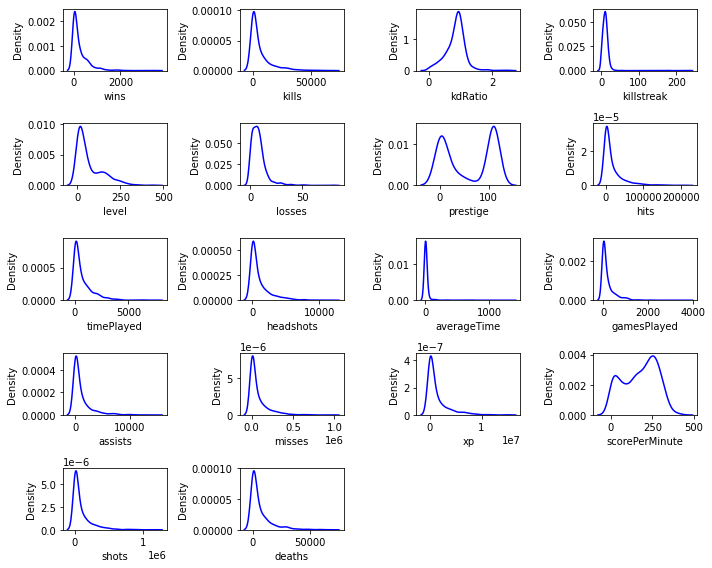

In [87]:
plt.figure(figsize=(10, 8))
for i in range(0, len(numerik)):
    plt.subplot(5, len(numerik)//4, i+1)
    sns.kdeplot(df[numerik[i]], color='blue')
    plt.tight_layout()

In [88]:
df[numerik].skew()

wins              2.7943
kills             2.5305
kdRatio           0.1604
killstreak       12.7792
level             1.4338
losses            2.8737
prestige         -0.0351
hits              2.8369
timePlayed        2.3515
headshots         2.5343
averageTime      10.0758
gamesPlayed       3.5103
assists           2.8756
misses            2.7281
xp                2.4353
scorePerMinute   -0.2069
shots             2.7227
deaths            2.5670
dtype: float64

### Melihat Correlation Matrix

<AxesSubplot:>

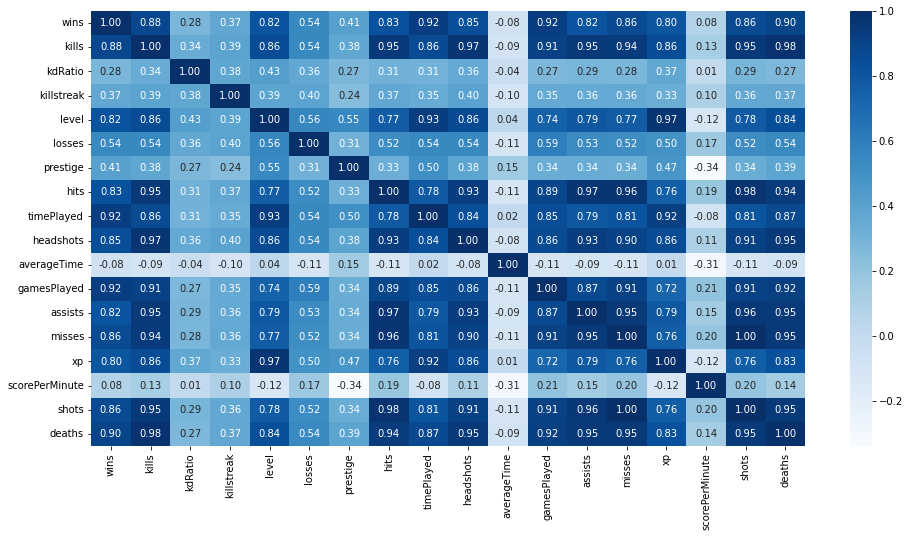

In [89]:
plt.figure(figsize=(16, 8))
sns.heatmap(df[numerik].corr(), cmap='Blues', annot=True, fmt='.2f')

### Melihat Outliers Data

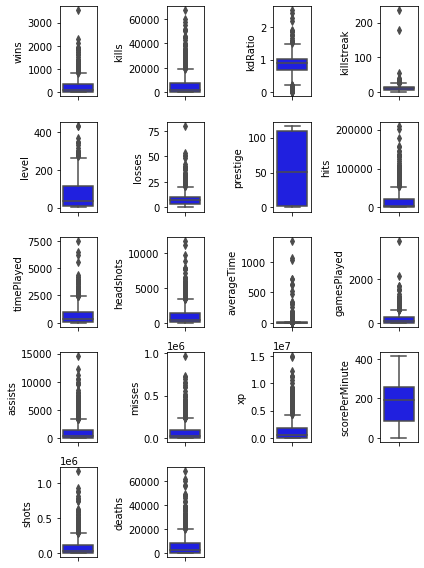

In [90]:
plt.figure(figsize=(6, 8))
for i in range(0, len(numerik)):
    plt.subplot(5, len(numerik)//4, i+1)
    sns.boxplot(y=df[numerik[i]], color='blue', orient='v')
    plt.tight_layout()

# Data Preprocessing

**Menyimpan Data yang sudah Bersih**

In [91]:
df.to_csv(path_or_buf='data/clean_data.csv', index=False)

- **name**<br>
this is the name for each player

- **wins**<br>
number of times the player win a match

- **kills**<br>
number of kills the player made in all his matches

- **kdRatio**<br>
kill/deaths ratio that means, if a player has 10 kills and 5 deaths, his KD ratio is equal to 2. A KD ratio of 1 means that the player got killed exactly as many times as he successfully eliminated his opponents
killstreak : kill a number of enemy players without dying.

- **level**<br>
is the player grade

- **losses**<br>
total number of losing

- **prestige**<br>
it is an optional Mode that players can choose after they progress to Level 55 and max

- **hits**<br>
number of times the player damaged another player

- **timePlayed**<br>
the time spent by every player playing Call of Duty in hours

- **headshots**<br>
number of times the player hit the others with headshots

- **averageTime**<br>
average time

- **gamesPlayed**<br>
number of times the player play multipalyer match

- **assists**<br>
number of times player damaging an enemy but a teammate gets the kill

- **misses**<br>
the number of times the player miss the hit

- **xp**<br>
Experience Points (XP) are a numerical quantity exclusive to multiplayer that dictates a player's level and progress in the game

- **scorePerMinute**<br>
a measure of how many points players are gaining per unit time

- **shots**<br>
number of shots the player did

- **deaths**<br>
number of time the player gots killed in the game

In [92]:
df.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
5,Brxndoon7-LK#4002715,684,27011,1.0667,18,177,10,110,98332,1366,5113,2.3231,588,6063,305319,3932335,255.6720,403651,25321
6,bdooory_ab#7095171,4,162,0.6328,4,6,2,0,568,8,35,2.0000,4,68,4836,24485,265.5000,5404,256
7,ahevepluto#3505304,186,1898,0.5696,13,37,7,2,5111,550,485,3.6667,150,488,39978,458269,180.3796,45089,3332
8,MilkyLemonz-_-#5981249,741,21803,1.0367,26,185,29,111,81361,2442,3894,2.8264,864,4029,327230,4269370,198.8442,408591,21032
9,RPDUNKduo#8122914,26,349,0.4440,7,12,4,0,996,44,40,2.9333,15,138,4844,72765,253.6773,5840,786


In [93]:
df['hits'] = df.hits / df.shots
df['misses'] = df.misses / df.shots
df['headshots'] = df.headshots / df.shots

df.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

In [94]:
numerik = df.select_dtypes(include=['int', 'float']).columns
print(f'Kolom Numerik\n{numerik}')

Kolom Numerik
Index(['wins', 'kills', 'kdRatio', 'killstreak', 'level', 'losses', 'prestige',
       'hits', 'timePlayed', 'headshots', 'averageTime', 'gamesPlayed',
       'assists', 'misses', 'xp', 'scorePerMinute', 'shots', 'deaths'],
      dtype='object')


### Feature Selection

In [95]:
fitur = ['kills', 'kdRatio', 'killstreak', 'hits', 'headshots', 'misses', 'deaths', 'scorePerMinute']

In [96]:
df[fitur].head()

,kills,kdRatio,killstreak,hits,headshots,misses,deaths,scorePerMinute
5,27011,1.0667,18,0.2436,0.0127,0.7564,25321,255.6720
6,162,0.6328,4,0.1051,0.0065,0.8949,256,265.5000
7,1898,0.5696,13,0.1134,0.0108,0.8866,3332,180.3796
8,21803,1.0367,26,0.1991,0.0095,0.8009,21032,198.8442
9,349,0.4440,7,0.1705,0.0068,0.8295,786,253.6773


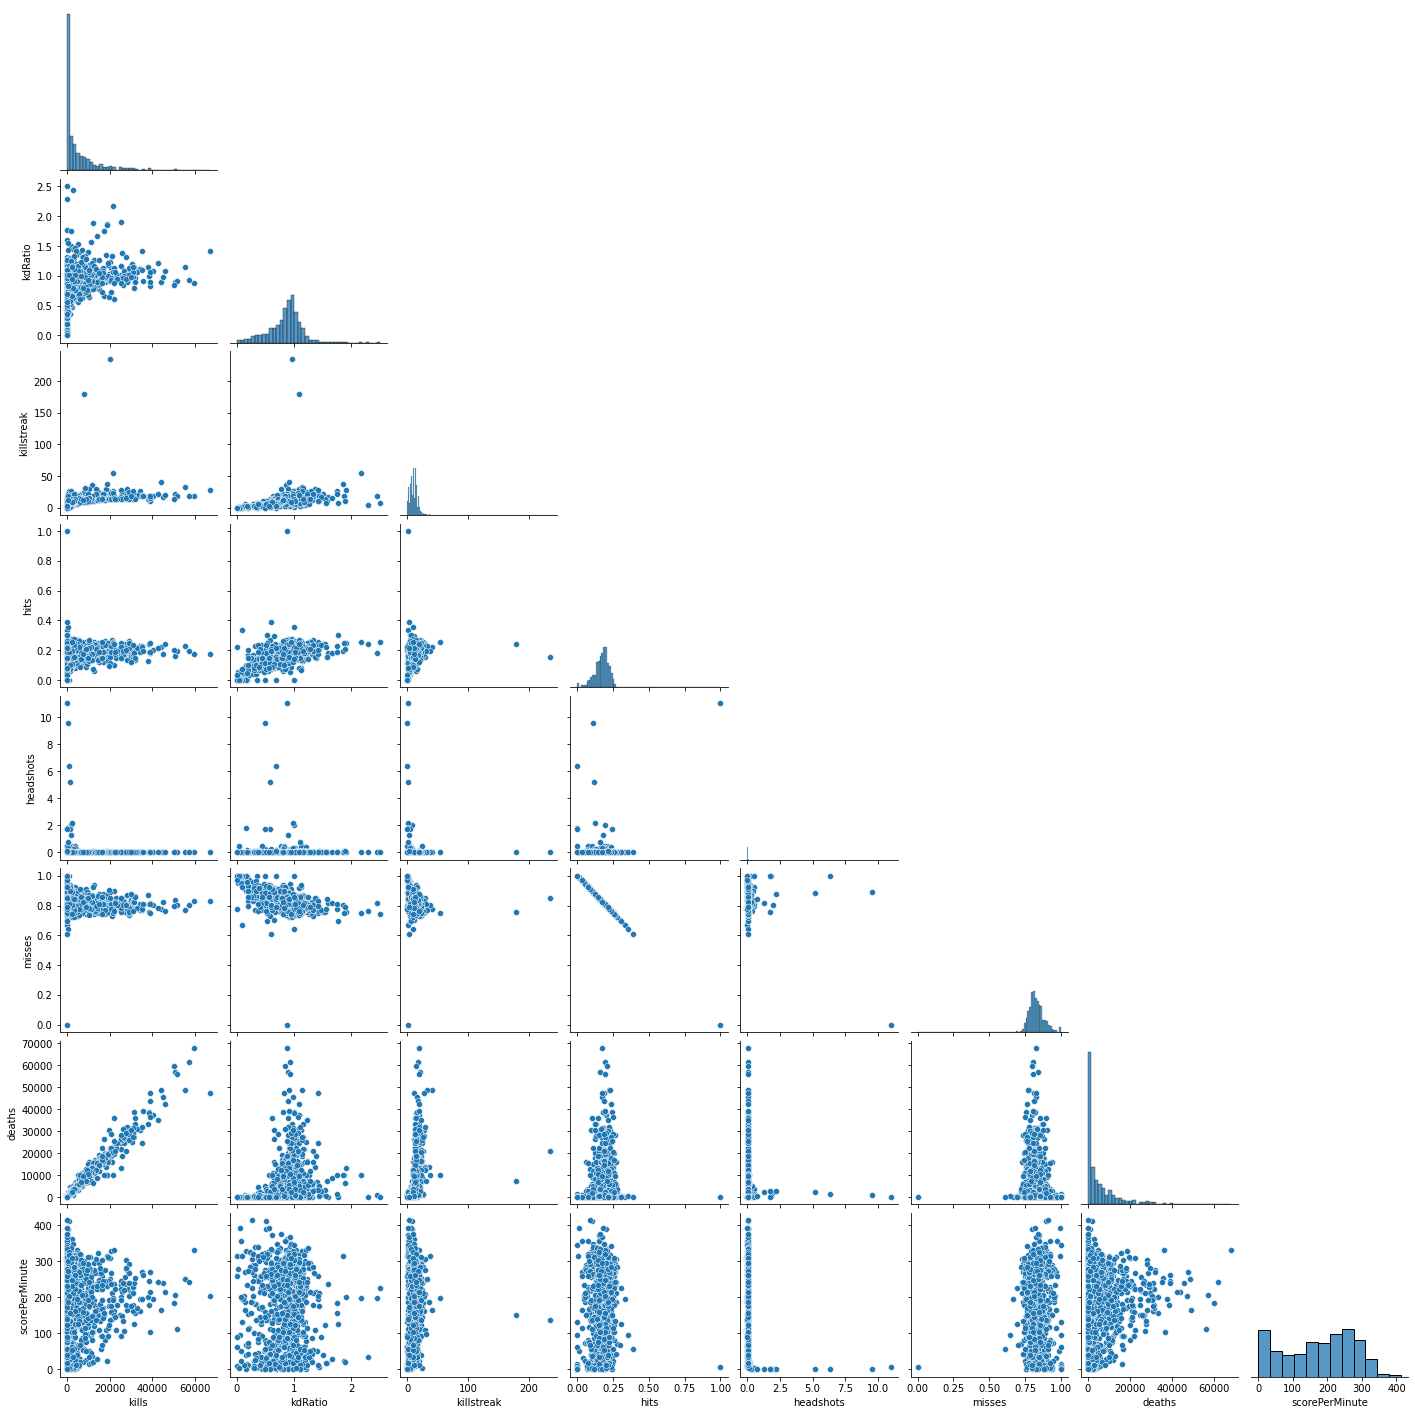

In [97]:
sns.pairplot(df[fitur], corner=True)

### Normalisasi
**Menggunakan Min-Max Scaler** pada kolom kdRatio<br>
**Menggunakan Robust Scaler** pada kolom lainnya => karena data memiliki outliers


In [98]:
df[fitur].describe().loc[['mean', '50%', 'min', 'max']]

,kills,kdRatio,killstreak,hits,headshots,misses,deaths,scorePerMinute
mean,6076.2599,0.8454,11.2140,0.1718,0.0662,0.8282,6264.6712,175.3505
50%,1978.5000,0.8909,11.0000,0.1780,0.0103,0.8220,2374.5000,190.4242
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0266
max,66935.0000,2.5000,235.0000,1.0000,11.0000,1.0000,67888.0000,413.8000


In [99]:
df[fitur].skew()

kills             2.5305
kdRatio           0.1604
killstreak       12.7792
hits              2.4660
headshots        15.5047
misses           -2.4651
deaths            2.5670
scorePerMinute   -0.2069
dtype: float64

In [100]:
kolom = df[fitur].skew()[df[fitur].skew() > 1].index
print(f'Kolom yang memiliki nilai Skew > 1:\n{kolom}')

Kolom yang memiliki nilai Skew > 1:
Index(['kills', 'killstreak', 'hits', 'headshots', 'deaths'], dtype='object')


#### **Tranformasi yeo-johnson**

In [101]:
yeo_johnson = PowerTransformer(method='yeo-johnson')
df[fitur] = yeo_johnson.fit_transform(df[fitur])

df[fitur].skew()

kills            -0.1099
kdRatio           0.1196
killstreak        0.1883
hits             -0.1257
headshots         1.9896
misses            0.3343
deaths           -0.0875
scorePerMinute   -0.4318
dtype: float64

In [102]:
df[fitur].head()

,kills,kdRatio,killstreak,hits,headshots,misses,deaths,scorePerMinute
5,1.5745,0.7293,1.0011,1.2421,-0.0698,-1.2622,1.5347,0.7915
6,-0.9367,-0.6974,-1.0759,-1.1939,-0.6331,1.2093,-0.9171,0.8750
7,0.0397,-0.9063,0.4612,-1.0327,-0.2344,1.0472,0.2653,0.1254
8,1.4274,0.6308,1.6771,0.5182,-0.3443,-0.5252,1.4037,0.2935
9,-0.6694,-1.3223,-0.4245,0.0255,-0.5966,-0.0240,-0.4501,0.7744


#### **RobustScaler**

In [103]:
df[fitur] = RobustScaler().fit_transform(df[fitur])
df[fitur].skew()

kills            -0.1099
kdRatio           0.1196
killstreak        0.1883
hits             -0.1257
headshots         1.9896
misses            0.3343
deaths           -0.0875
scorePerMinute   -0.4318
dtype: float64

In [104]:
df[fitur].head()

,kills,kdRatio,killstreak,hits,headshots,misses,deaths,scorePerMinute
5,0.9662,0.5582,0.6655,0.9591,0.3255,-0.9609,0.9085,0.3567
6,-0.6352,-0.8226,-1.0695,-1.1935,-0.5518,1.1886,-0.6278,0.4087
7,-0.0126,-1.0247,0.2145,-1.0511,0.0692,1.0476,0.1131,-0.0571
8,0.8724,0.4628,1.2302,0.3194,-0.1020,-0.3199,0.8264,0.0474
9,-0.4648,-1.4273,-0.5253,-0.1160,-0.4950,0.1160,-0.3352,0.3462


### Melihat Deskripsi Data

In [105]:
df[fitur].describe().loc[['mean', '50%', 'min', 'max']]

,kills,kdRatio,killstreak,hits,headshots,misses,deaths,scorePerMinute
mean,-0.0379,-0.1476,-0.1707,-0.1385,0.4343,0.1369,-0.0532,-0.1350
50%,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000
min,-1.3928,-2.8616,-2.5049,-3.2042,-1.6289,-6.6326,-1.5775,-1.3601
max,1.3978,5.0534,6.1084,7.6308,5.7626,3.1422,1.3806,1.1497


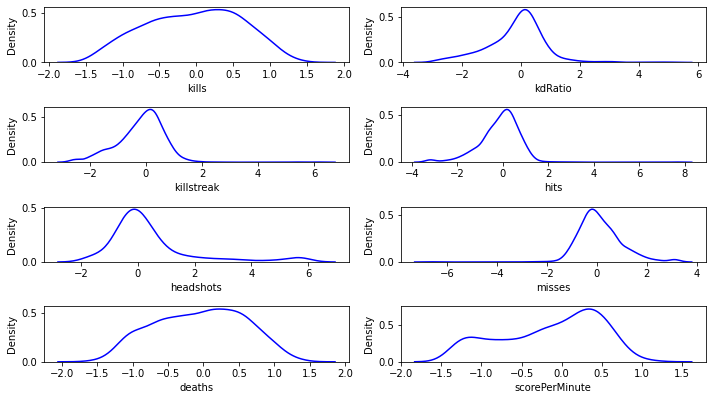

In [106]:
plt.figure(figsize=(10, 8))
for i in range(0, len(fitur)):
    plt.subplot(6, len(fitur)//4, i+1)
    sns.kdeplot(df[fitur[i]], color='blue')
    plt.tight_layout()

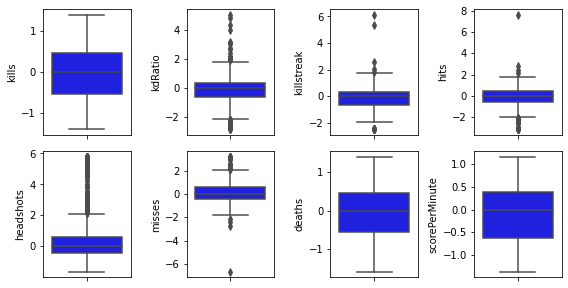

In [107]:
plt.figure(figsize=(8, 8))
for i in range(0, len(fitur)):
    plt.subplot(4, len(fitur)//2, i+1)
    sns.boxplot(y=df[fitur[i]], color='blue', orient='v')
    plt.tight_layout()

# Pemodelan

In [108]:
hasil = pd.DataFrame(columns=['Algoritma', 'Cluster', 'Evaluasi', 'Score'])
X = df[fitur]
X.head(5)

,kills,kdRatio,killstreak,hits,headshots,misses,deaths,scorePerMinute
5,0.9662,0.5582,0.6655,0.9591,0.3255,-0.9609,0.9085,0.3567
6,-0.6352,-0.8226,-1.0695,-1.1935,-0.5518,1.1886,-0.6278,0.4087
7,-0.0126,-1.0247,0.2145,-1.0511,0.0692,1.0476,0.1131,-0.0571
8,0.8724,0.4628,1.2302,0.3194,-0.1020,-0.3199,0.8264,0.0474
9,-0.4648,-1.4273,-0.5253,-0.1160,-0.4950,0.1160,-0.3352,0.3462


### Algoritma KMeans

In [109]:
scores = []

for k in range(2, 11):
    model = KMeans(n_clusters=k, max_iter=500, n_init=50, random_state=42)
    model.fit_predict(X, y=None) 
    scores.append(model.inertia_)

k = KneeLocator(range(2, 11), scores, curve="convex", direction="decreasing").elbow

print(f'Nilai Cluster pada KMeans : {k}')

Nilai Cluster pada KMeans : 4


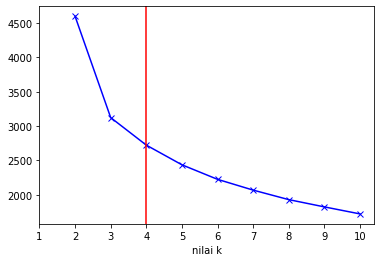

In [110]:
plt.plot(range(2, 11), scores, 'bx-')
plt.xlabel('nilai k')
plt.xticks(np.arange(1, 11, 1))
plt.axvline(x=k, color='red')
plt.show()

In [111]:
silhouette = []
ch_index = []
dbi = []

for k in range(2, 11):
    model = KMeans(n_clusters=k, max_iter=500, n_init=50, random_state=42)
    member = model.fit_predict(X, y=None) 

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)
    dbi_score = davies_bouldin_score(X, member)

    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)
    dbi.append(dbi_score)

for i, s, c, d in zip(range(2, 11), silhouette, ch_index, dbi):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))
    dbi_score = dbi.index(min(dbi))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\nDBI Score = {d}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]
k_dbi = range(2, 11)[dbi_score]

Jumlah Cluster = 2
Silhouette Score = 0.4776022450484287
CH Index Score = 394.41120700250684
DBI Score = 0.9910062117249162

Jumlah Cluster = 3
Silhouette Score = 0.3702424076269341
CH Index Score = 515.9228794133078
DBI Score = 0.9969154373326657

Jumlah Cluster = 4
Silhouette Score = 0.24312516260844985
CH Index Score = 441.09502814727045
DBI Score = 1.2584014889256077

Jumlah Cluster = 5
Silhouette Score = 0.2445446914039985
CH Index Score = 397.41696138177406
DBI Score = 1.2679373932519105

Jumlah Cluster = 6
Silhouette Score = 0.21645232006093937
CH Index Score = 366.0050730778681
DBI Score = 1.2961149400176823

Jumlah Cluster = 7
Silhouette Score = 0.2028281922307291
CH Index Score = 339.8740404843057
DBI Score = 1.2979897790941852

Jumlah Cluster = 8
Silhouette Score = 0.21177237901091953
CH Index Score = 321.71224879782585
DBI Score = 1.2637612830349698

Jumlah Cluster = 9
Silhouette Score = 0.2126610172547477
CH Index Score = 304.4406424164488
DBI Score = 1.2401532103340953

J

In [112]:
hasil = hasil.append({
    'Algoritma': 'K-Means',
    'Cluster': k_silhoutte,
    'Evaluasi': 'Silhoutte Score',
    'Score': max(silhouette)
}, ignore_index=True)

hasil = hasil.append({
    'Algoritma': 'K-Means',
    'Cluster': k_ch_index,
    'Evaluasi': 'CH Index Score',
    'Score': max(ch_index)
}, ignore_index=True)

hasil = hasil.append({
    'Algoritma': 'K-Means',
    'Cluster': k_dbi,
    'Evaluasi': 'DBI Score',
    'Score': min(dbi)
}, ignore_index=True)

print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

print(f'Jumlah Cluster CH Index = {k_dbi}')
print(f'Nilai CH Index Score = {min(dbi)}')

Jumlah Cluster Silhoutte = 2
Nilai Silhoutte Score = 0.4776022450484287

Jumlah Cluster CH Index = 3
Nilai CH Index Score = 515.9228794133078

Jumlah Cluster CH Index = 2
Nilai CH Index Score = 0.9910062117249162


### Spectral Clustering

In [113]:
silhouette = []
ch_index = []
dbi = []

for k in range(2, 11):
    model = SpectralClustering(n_clusters=k, random_state=42)
    member = model.fit_predict(X)

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)
    dbi_score = davies_bouldin_score(X, member)

    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)
    dbi.append(dbi_score)

for i, s, c, d in zip(range(2, 11), silhouette, ch_index, dbi):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))
    dbi_score = dbi.index(min(dbi))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\nDBI Score = {d}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]
k_dbi = range(2, 11)[dbi_score]

Jumlah Cluster = 2
Silhouette Score = 0.5128973805655794
CH Index Score = 10.838965777135602
DBI Score = 0.5494319744655425

Jumlah Cluster = 3
Silhouette Score = 0.47019860552154136
CH Index Score = 10.731230587771474
DBI Score = 0.5365311285847133

Jumlah Cluster = 4
Silhouette Score = 0.45320601287643597
CH Index Score = 22.43795286162379
DBI Score = 0.5010229426988579

Jumlah Cluster = 5
Silhouette Score = 0.482274550464365
CH Index Score = 90.96637711183794
DBI Score = 0.5677854065185155

Jumlah Cluster = 6
Silhouette Score = 0.41345620822132256
CH Index Score = 117.72701834710179
DBI Score = 0.5617714098879439

Jumlah Cluster = 7
Silhouette Score = 0.36136166964803457
CH Index Score = 152.800730429523
DBI Score = 0.7066174310251352

Jumlah Cluster = 8
Silhouette Score = 0.33760341753683737
CH Index Score = 93.39044228237282
DBI Score = 1.9203386697449267

Jumlah Cluster = 9
Silhouette Score = 0.3282190101149288
CH Index Score = 80.67737739654173
DBI Score = 0.749383985448457

Jum

In [114]:
hasil = hasil.append({
    'Algoritma': 'Spectral Clustering',
    'Cluster': k_silhoutte,
    'Evaluasi': 'Silhoutte Score',
    'Score': max(silhouette)
}, ignore_index=True)

hasil = hasil.append({
    'Algoritma': 'Spectral Clustering',
    'Cluster': k_ch_index,
    'Evaluasi': 'CH Index Score',
    'Score': max(ch_index)
}, ignore_index=True)

hasil = hasil.append({
    'Algoritma': 'Spectral Clustering',
    'Cluster': k_dbi,
    'Evaluasi': 'DBI Score',
    'Score': min(dbi)
}, ignore_index=True)

print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

print(f'Jumlah Cluster CH Index = {k_dbi}')
print(f'Nilai CH Index Score = {min(dbi)}')

Jumlah Cluster Silhoutte = 2
Nilai Silhoutte Score = 0.5128973805655794

Jumlah Cluster CH Index = 7
Nilai CH Index Score = 152.800730429523

Jumlah Cluster CH Index = 4
Nilai CH Index Score = 0.5010229426988579


### Algoritma MeanShift

In [115]:
model = MeanShift(max_iter=500)
member = model.fit_predict(X)

n_clusters = len(model.cluster_centers_)

silhouette_avg = silhouette_score(X, member)
ch_index_score = calinski_harabasz_score(X, member)
dbi_score = davies_bouldin_score(X, member)

print("Jumlah klaster: ", n_clusters)
print("Silhoutte Score: ", silhouette_avg)
print("CH Index Score: ", ch_index_score)
print("DBI Score: ", dbi_score)

hasil = hasil.append({
    'Algoritma': 'MeanShift',
    'Cluster': n_clusters,
    'Evaluasi': 'Silhoutte Score',
    'Score': silhouette_avg
}, ignore_index=True)

hasil = hasil.append({
    'Algoritma': 'MeanShift',
    'Cluster': n_clusters,
    'Evaluasi': 'CH Index Score',
    'Score': ch_index_score
}, ignore_index=True)

hasil = hasil.append({
    'Algoritma': 'MeanShift',
    'Cluster': n_clusters,
    'Evaluasi': 'DBI Score',
    'Score': dbi_score
}, ignore_index=True)

Jumlah klaster:  7
Silhoutte Score:  0.36627583795045837
CH Index Score:  87.94994943277253
DBI Score:  0.7960699330295675


### Agglomerative Clustering

In [116]:
silhouette = []
ch_index = []
dbi = []

for k in range(2, 11):
    model =  AgglomerativeClustering(n_clusters=k)
    member = model.fit_predict(X)

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)
    dbi_score = davies_bouldin_score(X, member)

    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)
    dbi.append(dbi_score)

for i, s, c, d in zip(range(2, 11), silhouette, ch_index, dbi):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))
    dbi_score = dbi.index(min(dbi))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\nDBI Score = {d}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]
k_dbi = range(2, 11)[dbi_score]

Jumlah Cluster = 2
Silhouette Score = 0.4319633507445799
CH Index Score = 364.08437242614866
DBI Score = 1.1597969829027104

Jumlah Cluster = 3
Silhouette Score = 0.3262595469030276
CH Index Score = 455.2531495630938
DBI Score = 1.0834143268561627

Jumlah Cluster = 4
Silhouette Score = 0.32198185572722715
CH Index Score = 379.11244796997516
DBI Score = 1.2533976088557193

Jumlah Cluster = 5
Silhouette Score = 0.25173249007116677
CH Index Score = 352.81728787889256
DBI Score = 1.3008643394613415

Jumlah Cluster = 6
Silhouette Score = 0.15601359482287008
CH Index Score = 320.9839539787048
DBI Score = 1.585634199141138

Jumlah Cluster = 7
Silhouette Score = 0.16561004834153997
CH Index Score = 297.9369441467638
DBI Score = 1.5034484848984448

Jumlah Cluster = 8
Silhouette Score = 0.16577734313174852
CH Index Score = 274.26507934109753
DBI Score = 1.3049257950324864

Jumlah Cluster = 9
Silhouette Score = 0.1463895280243894
CH Index Score = 257.8500859163748
DBI Score = 1.31939279838629

Ju

In [117]:
hasil = hasil.append({
    'Algoritma': 'Agglomerative Clustering',
    'Cluster': k_silhoutte,
    'Evaluasi': 'Silhoutte Score',
    'Score': max(silhouette)
}, ignore_index=True)

hasil = hasil.append({
    'Algoritma': 'Agglomerative Clustering',
    'Cluster': k_ch_index,
    'Evaluasi': 'CH Index Score',
    'Score': max(ch_index)
}, ignore_index=True)

hasil = hasil.append({
    'Algoritma': 'Agglomerative Clustering',
    'Cluster': k_dbi,
    'Evaluasi': 'DBI Score',
    'Score': min(dbi)
}, ignore_index=True)

print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

print(f'Jumlah Cluster CH Index = {k_dbi}')
print(f'Nilai CH Index Score = {min(dbi)}')

Jumlah Cluster Silhoutte = 2
Nilai Silhoutte Score = 0.4319633507445799

Jumlah Cluster CH Index = 3
Nilai CH Index Score = 455.2531495630938

Jumlah Cluster CH Index = 3
Nilai CH Index Score = 1.0834143268561627


### Algoritma Fuzzy C-Means

In [118]:
silhouette = []
ch_index = []
fpcs = []
dbi = []

for k in range(2, 11):
    cntr, u, u0, d, jm, p, fpc = cmeans(X.T, c=k, m=2.0, error=0.005, maxiter=1000, init=None, seed=42)
    member = np.argmax(u, axis=0)

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)
    dbi_score = davies_bouldin_score(X, member)

    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)
    dbi.append(dbi_score)
    fpcs.append(fpc)

for i, s, c, d, f in zip(range(2, 11), silhouette, ch_index, dbi, fpcs):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))
    dbi_score = dbi.index(min(dbi))
    fpc_score = fpcs.index(max(fpcs))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\nDBI Score = {d}\nFPC Score = {f}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]
k_dbi = range(2, 11)[dbi_score]
k_fpc = range(2, 11)[fpc_score]

Jumlah Cluster = 2
Silhouette Score = 0.28961096611899356
CH Index Score = 307.9058403025591
DBI Score = 1.491818864190407
FPC Score = 0.6332440224953969

Jumlah Cluster = 3
Silhouette Score = 0.3462442377855722
CH Index Score = 506.3753029454208
DBI Score = 1.0390322670698322
FPC Score = 0.5916508224385179

Jumlah Cluster = 4
Silhouette Score = 0.20871983960062204
CH Index Score = 425.5929780711046
DBI Score = 1.377525872229177
FPC Score = 0.45536269050625156

Jumlah Cluster = 5
Silhouette Score = 0.1655851413200902
CH Index Score = 365.3349812309135
DBI Score = 1.5306337120916536
FPC Score = 0.3622011111798555

Jumlah Cluster = 6
Silhouette Score = 0.16586566242010878
CH Index Score = 328.5331212664958
DBI Score = 1.4516523529351677
FPC Score = 0.3053769034718404

Jumlah Cluster = 7
Silhouette Score = 0.1608078293970955
CH Index Score = 309.154763907644
DBI Score = 1.4216021688257283
FPC Score = 0.2691110795124396

Jumlah Cluster = 8
Silhouette Score = 0.14184493325882427
CH Index Sc

In [119]:
hasil = hasil.append({
    'Algoritma': 'Fuzzy C-Means',
    'Cluster': k_silhoutte,
    'Evaluasi': 'Silhoutte Score',
    'Score': max(silhouette)
}, ignore_index=True)

hasil = hasil.append({
    'Algoritma': 'Fuzzy C-Means',
    'Cluster': k_ch_index,
    'Evaluasi': 'CH Index Score',
    'Score': max(ch_index)
}, ignore_index=True)

hasil = hasil.append({
    'Algoritma': 'Fuzzy C-Means',
    'Cluster': k_dbi,
    'Evaluasi': 'DBI Score',
    'Score': min(dbi)
}, ignore_index=True)

hasil = hasil.append({
    'Algoritma': 'Fuzzy C-Means',
    'Cluster': k_fpc,
    'Evaluasi': 'FPC Score',
    'Score': max(fpcs)
}, ignore_index=True)

print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

print(f'Jumlah Cluster CH Index = {k_dbi}')
print(f'Nilai CH Index Score = {min(dbi)}\n')

print(f'Jumlah Cluster FPC = {k_fpc}')
print(f'Nilai FPC Score = {max(fpcs)}')

Jumlah Cluster Silhoutte = 3
Nilai Silhoutte Score = 0.3462442377855722

Jumlah Cluster CH Index = 3
Nilai CH Index Score = 506.3753029454208

Jumlah Cluster CH Index = 3
Nilai CH Index Score = 1.0390322670698322

Jumlah Cluster FPC = 2
Nilai FPC Score = 0.6332440224953969


### Algoritma Affinity Propagation

In [120]:
model = AffinityPropagation(max_iter=500, random_state=42)
member = model.fit_predict(X)

n_clusters = len(model.cluster_centers_)

silhouette_avg = silhouette_score(X, member)
ch_index_score = calinski_harabasz_score(X, member)
dbi_score = davies_bouldin_score(X, member)

print("Jumlah klaster: ", n_clusters)
print("Silhoutte Score: ", silhouette_avg)
print("CH Index Score: ", ch_index_score)
print("DBI Score: ", dbi_score)

hasil = hasil.append({
    'Algoritma': 'Affinity Propagation',
    'Cluster': n_clusters,
    'Evaluasi': 'Silhoutte Score',
    'Score': silhouette_avg
}, ignore_index=True)

hasil = hasil.append({
    'Algoritma': 'Affinity Propagation',
    'Cluster': n_clusters,
    'Evaluasi': 'CH Index Score',
    'Score': ch_index_score
}, ignore_index=True)

hasil = hasil.append({
    'Algoritma': 'Affinity Propagation',
    'Cluster': n_clusters,
    'Evaluasi': 'DBI Score',
    'Score': dbi_score
}, ignore_index=True)

Jumlah klaster:  58
Silhoutte Score:  0.16683850930183136
CH Index Score:  141.71633017919464
DBI Score:  1.1854215426013837


### Algoritma Gaussian Mixture

In [121]:
silhouette = []
ch_index = []
dbi = []

for k in range(2, 11):
    model =  GaussianMixture(n_components=k, max_iter=500, n_init=50, random_state=42)
    member = model.fit_predict(X)

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)
    dbi_score = davies_bouldin_score(X, member)

    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)
    dbi.append(dbi_score)

for i, s, c, d in zip(range(2, 11), silhouette, ch_index, dbi):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))
    dbi_score = dbi.index(min(dbi))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\nDBI Score = {d}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]
k_dbi = range(2, 11)[dbi_score]

Jumlah Cluster = 2
Silhouette Score = 0.42620629493380885
CH Index Score = 194.84732166664125
DBI Score = 2.006012867066865

Jumlah Cluster = 3
Silhouette Score = 0.376705532048832
CH Index Score = 417.072919724178
DBI Score = 1.0345520531856538

Jumlah Cluster = 4
Silhouette Score = 0.21663537809390546
CH Index Score = 156.3813693440942
DBI Score = 2.1499464336091605

Jumlah Cluster = 5
Silhouette Score = 0.2094466560824246
CH Index Score = 242.66472431498124
DBI Score = 1.5087179013810712

Jumlah Cluster = 6
Silhouette Score = 0.16690414142451854
CH Index Score = 239.21227249181635
DBI Score = 1.6545750147020541

Jumlah Cluster = 7
Silhouette Score = 0.18716250932908268
CH Index Score = 218.87396326719755
DBI Score = 1.8960845328393028

Jumlah Cluster = 8
Silhouette Score = 0.10007141852330445
CH Index Score = 207.10618237118243
DBI Score = 1.999165250660371

Jumlah Cluster = 9
Silhouette Score = 0.10085844532197855
CH Index Score = 193.14947535509455
DBI Score = 1.846041664338216

J

In [122]:
hasil = hasil.append({
    'Algoritma': 'Gaussian Mixture',
    'Cluster': k_silhoutte,
    'Evaluasi': 'Silhoutte Score',
    'Score': max(silhouette)
}, ignore_index=True)

hasil = hasil.append({
    'Algoritma': 'Gaussian Mixture',
    'Cluster': k_ch_index,
    'Evaluasi': 'CH Index Score',
    'Score': max(ch_index)
}, ignore_index=True)

hasil = hasil.append({
    'Algoritma': 'Gaussian Mixture',
    'Cluster': k_dbi,
    'Evaluasi': 'DBI Score',
    'Score': min(dbi)
}, ignore_index=True)

print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

print(f'Jumlah Cluster CH Index = {k_dbi}')
print(f'Nilai CH Index Score = {min(dbi)}')

Jumlah Cluster Silhoutte = 2
Nilai Silhoutte Score = 0.42620629493380885

Jumlah Cluster CH Index = 3
Nilai CH Index Score = 417.072919724178

Jumlah Cluster CH Index = 3
Nilai CH Index Score = 1.0345520531856538


# Kesimpulan

In [123]:
hasil

,Algoritma,Cluster,Evaluasi,Score
0,K-Means,2,Silhoutte Score,0.4776
1,K-Means,3,CH Index Score,515.9229
2,K-Means,2,DBI Score,0.9910
3,Spectral Clustering,2,Silhoutte Score,0.5129
4,Spectral Clustering,7,CH Index Score,152.8007
5,Spectral Clustering,4,DBI Score,0.5010
6,MeanShift,7,Silhoutte Score,0.3663
7,MeanShift,7,CH Index Score,87.9499
8,MeanShift,7,DBI Score,0.7961
9,Agglomerative Clustering,2,Silhoutte Score,0.4320


In [124]:
hasil.sort_values(by=['Evaluasi', 'Score'], ascending=False, ignore_index=True)

,Algoritma,Cluster,Evaluasi,Score
0,Spectral Clustering,2,Silhoutte Score,0.5129
1,K-Means,2,Silhoutte Score,0.4776
2,Agglomerative Clustering,2,Silhoutte Score,0.4320
3,Gaussian Mixture,2,Silhoutte Score,0.4262
4,MeanShift,7,Silhoutte Score,0.3663
5,Fuzzy C-Means,3,Silhoutte Score,0.3462
6,Affinity Propagation,58,Silhoutte Score,0.1668
7,Fuzzy C-Means,2,FPC Score,0.6332
8,Affinity Propagation,58,DBI Score,1.1854
9,Agglomerative Clustering,3,DBI Score,1.0834


Mengelompokkan data untuk mengambil 
- **Nilai Score Maksimal** pada setiap kategori Evaluasi

Lalu menampilkan Algoritma dan jumlah Cluster sesuai dengan nilai Score tersebut

Berdasarkan Analisis Hasil saya, Jumlah Cluster yang akan digunakan pada setiap Algoritma<br>
- K-Means = 2 & 3
- MeanShift = 7
- Agglomerative = 2 & 3
- Fuzzy C-Means = 2 & 3
- Gaussian Mixture = 2 & 3

Saya tidak menggunakan Algoritma Affinity Propagation karena menghasilkan terlalu banyak Cluster sehingga tidak efektif

### Mencoba Melihat Jumlah Anggota Setiap Cluster

#### Algoritma K-Means dengan 2 Cluster

In [125]:
model = KMeans(n_clusters=2, max_iter=500, n_init=50, random_state=42)
model.fit_predict(X, y=None)

df_kmeans = df.copy()
df_kmeans['Cluster'] = model.labels_
df_kmeans['Cluster'].value_counts()

0    845
1    113
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='kills', ylabel='deaths'>

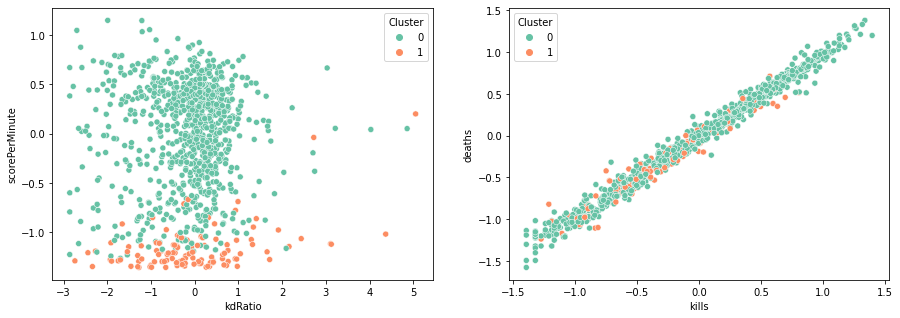

In [126]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x='kdRatio', y='scorePerMinute', hue='Cluster', data=df_kmeans, palette='Set2', ax=ax[0])
sns.scatterplot(x='kills', y='deaths', hue='Cluster', data=df_kmeans, palette='Set2', ax=ax[1])

#### Algoritma K-Means dengan 3 Cluster

In [127]:
model = KMeans(n_clusters=3, max_iter=500, n_init=50, random_state=42)
model.fit_predict(X, y=None)

df_kmeans = df.copy()
df_kmeans['Cluster'] = model.labels_
df_kmeans['Cluster'].value_counts()

1    620
0    231
2    107
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='kills', ylabel='deaths'>

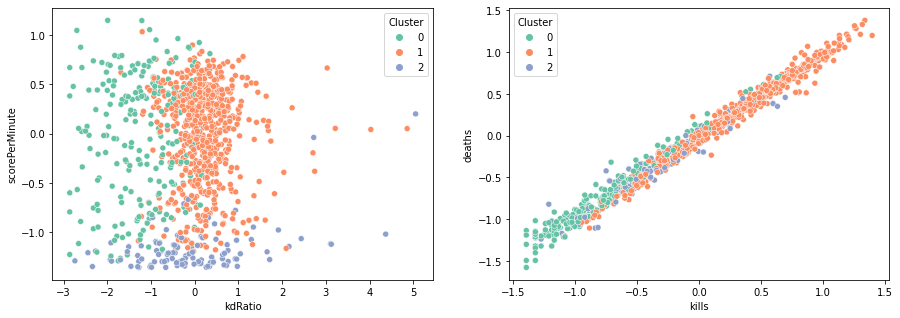

In [128]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x='kdRatio', y='scorePerMinute', hue='Cluster', data=df_kmeans, palette='Set2', ax=ax[0])
sns.scatterplot(x='kills', y='deaths', hue='Cluster', data=df_kmeans, palette='Set2', ax=ax[1])

#### Algoritma MeanShift dengan 7 Cluster

In [129]:
model = MeanShift(max_iter=500)
model.fit_predict(X)

df_meanshift = df.copy()
df_meanshift['Cluster'] = model.labels_
df_meanshift['Cluster'].value_counts()

0    830
1    111
3      6
4      5
6      3
2      2
5      1
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='kills', ylabel='deaths'>

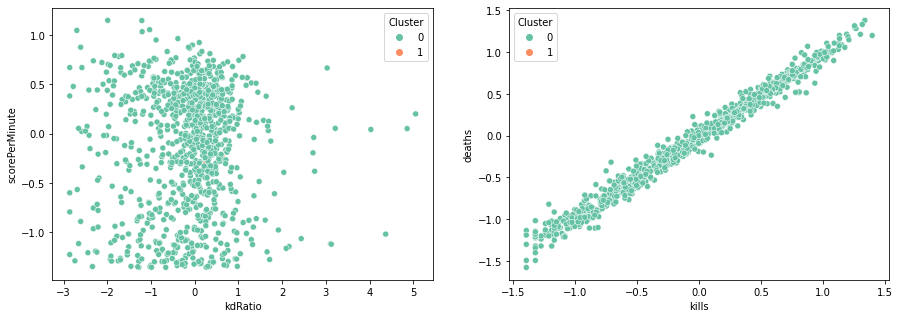

In [130]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x='kdRatio', y='scorePerMinute', hue='Cluster', data=df_spectral, palette='Set2', ax=ax[0])
sns.scatterplot(x='kills', y='deaths', hue='Cluster', data=df_spectral, palette='Set2', ax=ax[1])

#### Algoritma Agglomerative Clustering dengan 2 Cluster

In [131]:
model = AgglomerativeClustering(n_clusters=2)
model.fit_predict(X)

df_agglomerative = df.copy()
df_agglomerative['Cluster'] = model.labels_
df_agglomerative['Cluster'].value_counts()

0    815
1    143
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='kills', ylabel='deaths'>

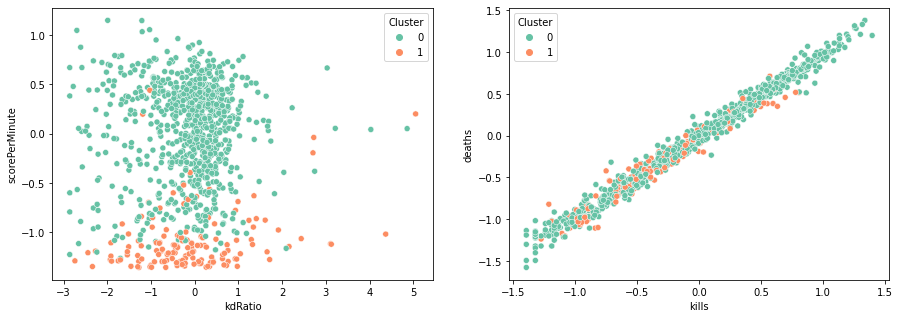

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x='kdRatio', y='scorePerMinute', hue='Cluster', data=df_agglomerative, palette='Set2', ax=ax[0])
sns.scatterplot(x='kills', y='deaths', hue='Cluster', data=df_agglomerative, palette='Set2', ax=ax[1])

#### Algoritma Agglomerative Clustering dengan 3 Cluster

In [133]:
model = AgglomerativeClustering(n_clusters=3)
model.fit_predict(X)

df_agglomerative = df.copy()
df_agglomerative['Cluster'] = model.labels_
df_agglomerative['Cluster'].value_counts()

2    547
1    268
0    143
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='kills', ylabel='deaths'>

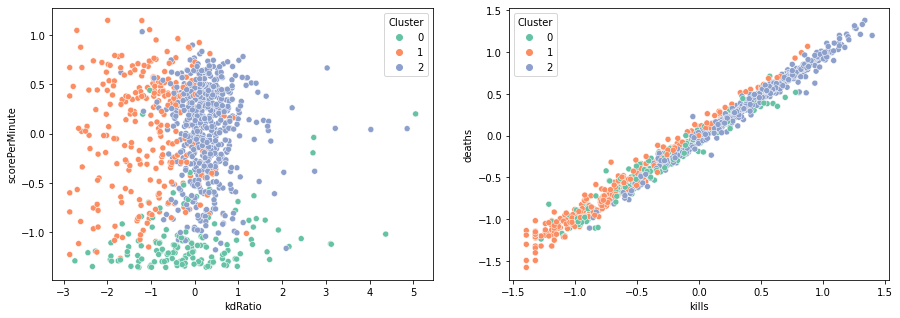

In [134]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x='kdRatio', y='scorePerMinute', hue='Cluster', data=df_agglomerative, palette='Set2', ax=ax[0])
sns.scatterplot(x='kills', y='deaths', hue='Cluster', data=df_agglomerative, palette='Set2', ax=ax[1])

#### Algoritma Fuzzy C-Means dengan 2 Cluster

In [135]:
cntr, u, u0, d, jm, p, fpc = cmeans(X.T, c=2, m=2.0, error=0.005, maxiter=1000, init=None, seed=42)
member = np.argmax(u, axis=0)

df_fuzzy = df.copy()
df_fuzzy['Cluster'] = member
df_fuzzy['Cluster'].value_counts()

0    619
1    339
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='kills', ylabel='deaths'>

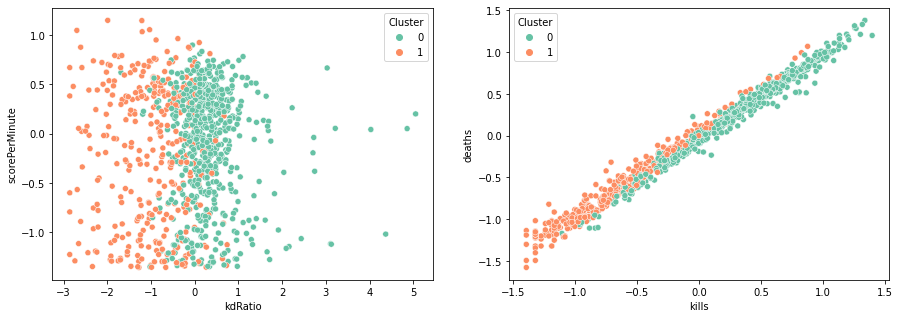

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x='kdRatio', y='scorePerMinute', hue='Cluster', data=df_fuzzy, palette='Set2', ax=ax[0])
sns.scatterplot(x='kills', y='deaths', hue='Cluster', data=df_fuzzy, palette='Set2', ax=ax[1])

#### Algoritma Fuzzy C-Means dengan 3 Cluster

In [137]:
cntr, u, u0, d, jm, p, fpc = cmeans(X.T, c=3, m=2.0, error=0.005, maxiter=1000, init=None, seed=42)
member = np.argmax(u, axis=0)

df_fuzzy = df.copy()
df_fuzzy['Cluster'] = member
df_fuzzy['Cluster'].value_counts()

2    565
1    279
0    114
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='kills', ylabel='deaths'>

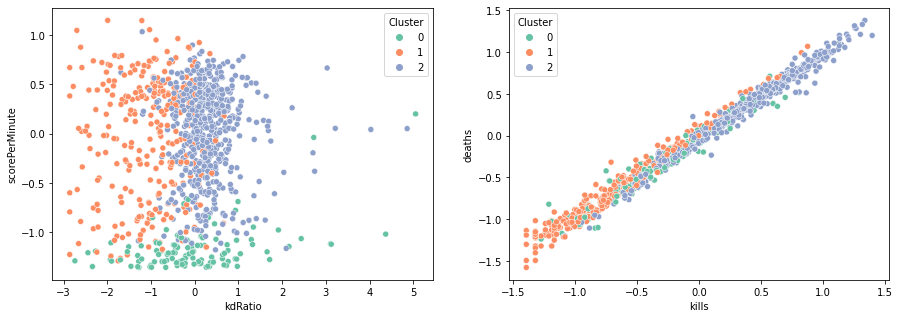

In [138]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x='kdRatio', y='scorePerMinute', hue='Cluster', data=df_fuzzy, palette='Set2', ax=ax[0])
sns.scatterplot(x='kills', y='deaths', hue='Cluster', data=df_fuzzy, palette='Set2', ax=ax[1])

#### Algoritma Gaussian Mixture dengan 2 Cluster

In [139]:
model = GaussianMixture(n_components=2, max_iter=500, n_init=50, random_state=42)
member = model.fit_predict(X)

df_gaussian = df.copy()
df_gaussian['Cluster'] = member
df_gaussian['Cluster'].value_counts()

1    779
0    179
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='kills', ylabel='deaths'>

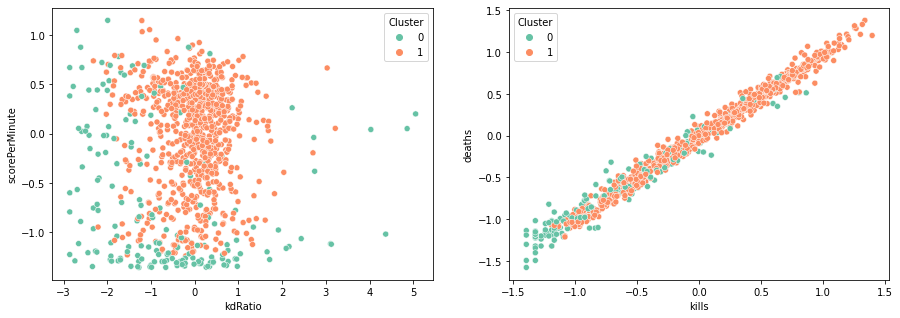

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x='kdRatio', y='scorePerMinute', hue='Cluster', data=df_gaussian, palette='Set2', ax=ax[0])
sns.scatterplot(x='kills', y='deaths', hue='Cluster', data=df_gaussian, palette='Set2', ax=ax[1])

#### Algoritma Gaussian Mixture dengan 3 Cluster

In [141]:
model = GaussianMixture(n_components=3, max_iter=500, n_init=50, random_state=42)
member = model.fit_predict(X)

df_gaussian = df.copy()
df_gaussian['Cluster'] = member
df_gaussian['Cluster'].value_counts()

1    691
2    164
0    103
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='kills', ylabel='deaths'>

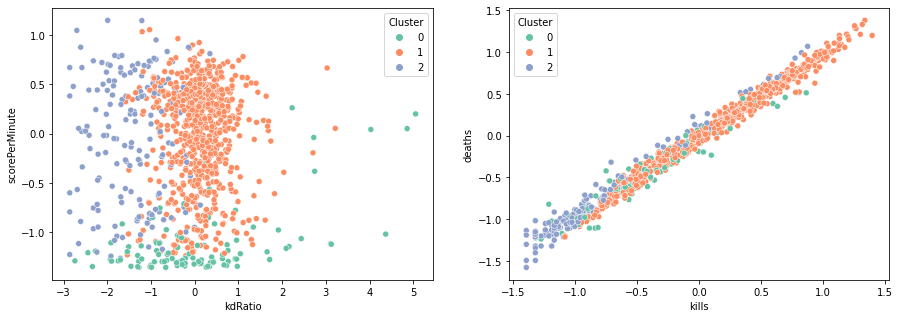

In [142]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x='kdRatio', y='scorePerMinute', hue='Cluster', data=df_gaussian, palette='Set2', ax=ax[0])
sns.scatterplot(x='kills', y='deaths', hue='Cluster', data=df_gaussian, palette='Set2', ax=ax[1])

### Kesimpulan Akhir
Berdasarkan Analisis dalam melihat jumlah anggota setiap Cluster, maka Algoritma yang paling optimal
- K-Means dengan jumlah Cluster 3
- Agglomerative Clustering dengan jumlah Cluster 3
- Fuzzy C-Means dengan jumlah Cluster 3
- Gaussian Mixture dengan jumlah Cluster 3